In [1]:
import sys
from pathlib import Path
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


files_path = str(Path().cwd().parent)
sys.path.insert(0, files_path)

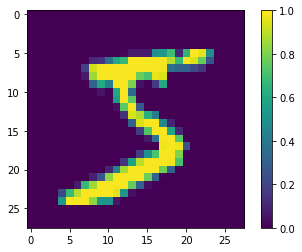

In [2]:
threshold = False

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize dataset
# source: https://www.tensorflow.org/quantum/tutorials/mnist
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0

#    apply threshold
if threshold:
    black_or_white = np.vectorize(lambda x : 0 if x < 0.5 else 1)
    x_train = black_or_white(x_train)
    x_test = black_or_white(x_test)
# x_test = black_or_white(x_test)

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()
plt.show()

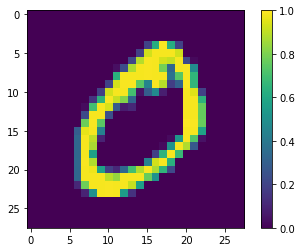

In [3]:
plt.imshow(x_train[1, :, :, 0])
plt.colorbar()
plt.show()

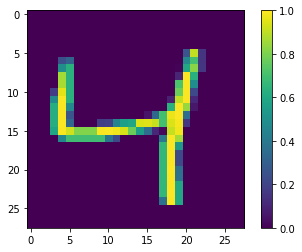

In [4]:
plt.imshow(x_train[2, :, :, 0])
plt.colorbar()
plt.show()

There is not a big different between 0.4, 0.5, 0.6 

In [5]:
df_train = pd.DataFrame( x_train[:, :, :, 0].reshape(x_train[:, :, :, 0].shape[0], 28*28))
df_train["label"] = y_train
# df_test = pd.DataFrame( x_test[:, :, :, 0].reshape(x_test[:, :, :, 0].shape[0], 28*28))
# df_test["label"] = y_test

# df = pd.concat([df_train, df_test])
# df.reset_index(inplace=True, drop=True)
X_train = df_train.drop(['label'], axis=1)
y_train = df_train['label']

In [6]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


# shifting

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation


Example on how you can import our python class. Dont forget to run the first cell!

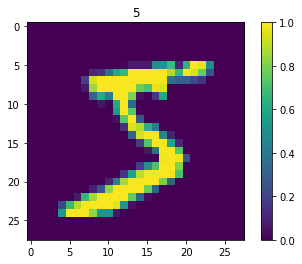

In [11]:
from preprocess.get_data import aquire_data

# todo: allow unnormalized data
data_preprocess_params = {
    "threshold": True,
    "augment_data": {"rotate": False, "shift": False, "zoom": False, "shear": False, "all": False},
}
# function return generator. does not do any manipulations on the test set

train, test = aquire_data(**data_preprocess_params)


# stop the iterator after certain iterations 
"""
for x,y in stop_iterator(train, 300):
    # your code
    

"""
for i,(x, y) in enumerate(train):
    plt.imshow(x.reshape(28, 28))
    plt.title(y)
    plt.colorbar()
    plt.show()
    break

## MLP Model

In [ ]:
class GradientDescent:    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        
    def run(self, gradient_fn, x, y, params):
        norms = np.array([np.inf])
        t = 1
        while np.any(norms > self.epsilon) and t < self.max_iters:
            grad = gradient_fn(x, y, params)
            for p in range(len(params)):
                params[p] -= self.learning_rate * grad[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
        return params


class MLP:
    def __init__(self, activation_fnc, weight, bias, n_hidden_layers=2, n_units_hidden_layers=64):
        self.activation_fnc = activation_fnc
        self.n_hidden_layers = n_hidden_layers
        self.n_units_hidden_layers = n_units_hidden_layers
        self.weight = weight
        self.bias = bias

    def fit(self, X_train, y_train, learning_rate, n_iter):
        """"
        input of x_train is 1x784 column matrix
        
        
        output layer is 10 big for the 10 numbers (0 to 9)
        """
        pass

    def predict(self, X_test, y_test):
        pass

## Run experiments

In [ ]:
sigmoid = lambda x: x+1
tanh = lambda x: x-1
relu = lambda x: x**2

MLP_params = {
    "activation_fnc": lambda x: x + 1,
    "weight": 20000,
    "bias": 0.001,
    "n_hidden_layers": 2,
    "n_units_hidden_layers": 64,
}


MLP_params_signmoid_low_weight = {
    "activation_fnc": lambda x: x + 1,
    "weight": 200,
    "bias": 0.001,
    "n_hidden_layers": 2,
    "n_units_hidden_layers": 64,
}



train, test = aquire_data(**data_preprocess_params)
model = MLP(**MLP_params)
model.fit(1, 2, 3, 4)


# Team Discussion

## Task 1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6a04c32-5dea-4da7-943b-a573306dab4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>